In [12]:
# Import Libraries and define functions
import csv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')

def set_style():
    plt.minorticks_on()
    # plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.4)
    # plt.grid(b=True, which='minor', color='white', linestyle='-', alpha=0.4)
    # plt.grid(visible=True, which='minor', color='white', linestyle='-', alpha=0.4)
    plt.grid(which='minor', color='white', linestyle='-', alpha=0.2)
    plt.style.use('ggplot')
    # plt.style.use('seaborn-v0_8')
    plt.rcParams.update({'font.size': 22})
    legend = plt.gca().legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., frameon = 1)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')


def save_fig(file_name):
    plt.savefig(file_name, dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.02,
        frameon=None, metadata=None)

def read_file(path):
  with open(path, 'r') as fd:
    cwriter = csv.reader(fd)
    data = []
    skipped_first_row = False
    for row in cwriter:
      if not skipped_first_row:
        skipped_first_row = True
        continue
      row_tmp = row
      for idx in range(len(row_tmp)):
        row_tmp[idx] = float(row_tmp[idx])
      data.append(row_tmp)
    config = data[0]
    data = data[1]
  return data, config


def read_data_folder(path):
  data_max = []
  data_all = []
  configs = []
  for idx in range(1, DESIGNS+1):
    data, config = read_file(path + '{}.csv'.format(idx))
    for d in data:
        data_all.append(d)
    data_max.append(np.amax(data))
    data = np.array(data)
    data_all.append(data)
    configs.append(config)
  return data_all, data_max, configs
    

def compute_mean_std(paths):
  data_max_ar = []
  data_top_mean_ar = []
  configs_ar = []
  data_all_ar = []
  for p in paths:
    data_all, data_max, configs = read_data_folder(p)
    data_all_ar.append(data_all)
    data_max_ar.append(data_max)
    configs_ar.append(configs)
  data_max_mean = np.mean(data_max_ar, axis=0)
  data_max_std = np.std(data_max_ar, axis=0)
  return data_max_mean, data_max_std


def plot_data_means(mean_data, std_data, color, label='', plot_random_std=False):
  x = np.arange(1, len(mean_data) + 1)
  init_data_mean = mean_data[0:INITIAL_DESIGNS+1]
  init_data_std = std_data[0:INITIAL_DESIGNS+1]
  init_x = x[0:INITIAL_DESIGNS+1]
  optim_data_mean = mean_data[INITIAL_DESIGNS::2]
  optim_data_std = std_data[INITIAL_DESIGNS::2]
  optim_x = x[INITIAL_DESIGNS::2]
  random_data_mean = mean_data[INITIAL_DESIGNS+1::2]
  random_data_std = std_data[INITIAL_DESIGNS+1::2]
  random_x = x[INITIAL_DESIGNS+1::2]
  plt.plot(init_x, init_data_mean, color=color, alpha=0.7, linewidth=2.0)
  plt.fill_between(init_x, init_data_mean - init_data_std, init_data_mean + init_data_std, facecolor=color, alpha=0.1)
  plt.plot(optim_x, optim_data_mean, color=color, label=label, linewidth=2.0)
  plt.fill_between(optim_x, optim_data_mean - optim_data_std, optim_data_mean + optim_data_std, facecolor=color, alpha=0.2)
  #plt.plot(random_x, random_data_mean, color=color, linestyle='--')
  if plot_random_std:
    plt.fill_between(random_x, random_data_mean - random_data_std, random_data_mean + random_data_std, facecolor=color, alpha=0.2)
  set_style()

    
def plot_data_means_optim_random(mean_data, std_data, color, label=''):
  x = np.arange(1, len(mean_data) + 1)
  init_data_mean = mean_data[0:INITIAL_DESIGNS+1]
  init_data_std = std_data[0:INITIAL_DESIGNS+1]
  init_x = x[0:INITIAL_DESIGNS+1]
  optim_data_mean = mean_data[INITIAL_DESIGNS::2]
  optim_data_std = std_data[INITIAL_DESIGNS::2]
  optim_x = x[INITIAL_DESIGNS::2]
  random_data_mean = mean_data[INITIAL_DESIGNS+1::2]
  random_data_std = std_data[INITIAL_DESIGNS+1::2]
  random_x = x[INITIAL_DESIGNS+1::2]
  plt.plot(init_x, init_data_mean, color=color, alpha=0.3, linewidth=2.0)
  # plt.plot(init_x, init_data_mean) #color=color, alpha=0.3, linewidth=2.0)
  plt.fill_between(init_x, init_data_mean - init_data_std, init_data_mean + init_data_std, facecolor=color, alpha=0.1)
  plt.plot(optim_x, optim_data_mean, color=color, linewidth=2.0, label=label)
  # plt.plot(optim_x, optim_data_mean) # color=color, linewidth=2.0, label=label)
  plt.fill_between(optim_x, optim_data_mean - optim_data_std, optim_data_mean + optim_data_std, facecolor=color, alpha=0.2)
  plt.plot(random_x, random_data_mean, color=color, label=label + ' Random Exploration', linestyle='--', linewidth=2.0)
  # plt.plot(random_x, random_data_mean) #color=color, label=label + ' Random Exploration', linestyle='--', linewidth=2.0)
  plt.fill_between(random_x, random_data_mean - random_data_std, random_data_mean + random_data_std, facecolor=color, alpha=0.2)
  set_style()




In [13]:
# Change these parameters as required
INITIAL_DESIGNS = 3
DESIGNS = 21

# Proposed method using data-driven design optimization
# Change folder names
EXPERIMENT_FOLDERS_1 = [
    # 'data_exp_sac_pso_batch/Mon_Oct_21_05:47:55_2019__e37381f2',
    # 'data_exp_sac_pso_batch/Mon_Oct_21_05:48:30_2019__0041f8c5',
    # 'data_exp_sac_pso_batch/Mon_Oct_21_05:49:00_2019__5e2e3460',
    # 'data_exp_sac_pso_batch/Sun_Oct_20_23:36:49_2019__5db36c30',
    # 'data_exp_sac_pso_batch/Sun_Oct_20_23:37:06_2019__30302df7',

    'data_exp_sac_pso_batch/Sun_Mar_23_15:01:43_2025__b111ccee',
    'data_exp_sac_pso_batch/Sun_Mar_23_15:10:07_2025__a1f3dcc7',
    'data_exp_sac_pso_batch/Sun_Mar_23_16:18:49_2025__a2cd9cde'
]

# Baseline using simulations for the evaluation of design candidates
# Change folder names
EXPERIMENTS_FOLDERS_2 = [
    'data_exp_sac_pso_sim/Wed_Oct_23_05:49:05_2019__32509883',
    'data_exp_sac_pso_sim/Wed_Oct_23_05:49:22_2019__6878474d',
    'data_exp_sac_pso_sim/Wed_Oct_23_05:51:21_2019__36c0fafc',
    'data_exp_sac_pso_sim/Wed_Oct_23_05:51:33_2019__b21f861b',
    'data_exp_sac_pso_sim/Wed_Oct_23_05:51:45_2019__cc74a513',
]


In [14]:
%matplotlib inline

In [15]:
exp_files = ['{}/data_design_'.format(folder) for folder in EXPERIMENT_FOLDERS_1] # Novelty Search + PSO on Q
exp_mean, exp_std = compute_mean_std(exp_files)
print(exp_mean)

[ 5.60229446 -1.48677257  2.40869763 -0.05446141  3.91542511 11.15445184
  8.72377978 14.88095959 13.62586882 16.05922441  9.04719224 11.28422333
  7.17454717  7.95290326  3.2215533   9.91093572  2.7547286  10.87572726
  8.09860452 10.24179664 10.94738241]


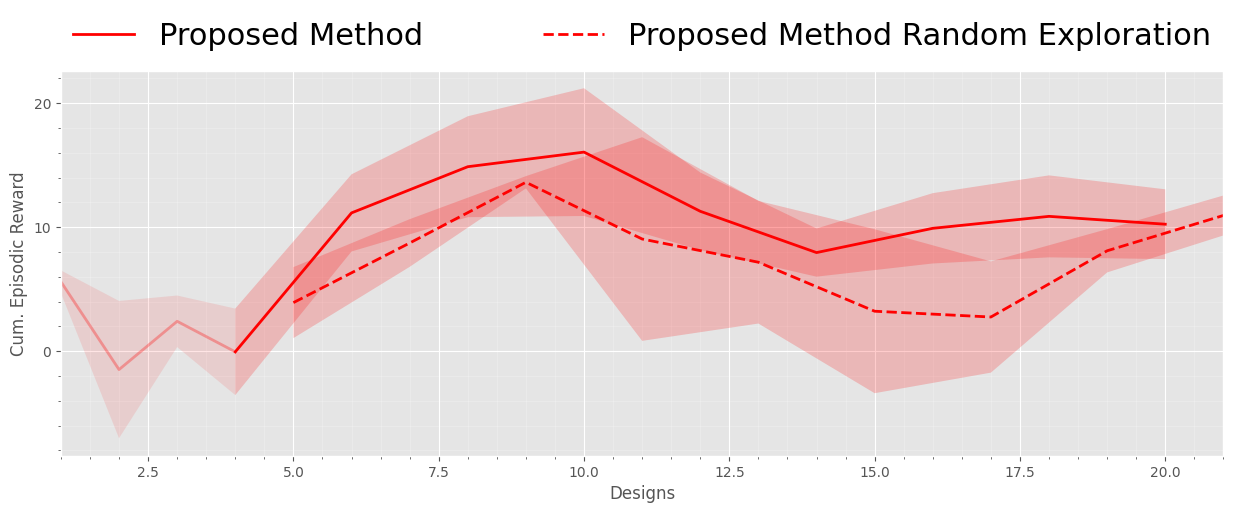

In [16]:
# Plot performance of optimized designs and randomly selected designs
# plot_data_means_optim_random(exp_mean, exp_std, color='red', label='Proposed Method')
# plot_data_means_optim_random(exp_mean, exp_std, color='red', label='Proposed Method')
plt.ylabel('Cum. Episodic Reward')
plt.xlabel('Designs')
# plt.ylim([150,600])
plt.xlim([1,DESIGNS])
plot_data_means_optim_random(exp_mean, exp_std, color='red', label='Proposed Method')
plt.show()
#save_fig('plots_HalfCheetah_random_vs_novelty_search.pdf')

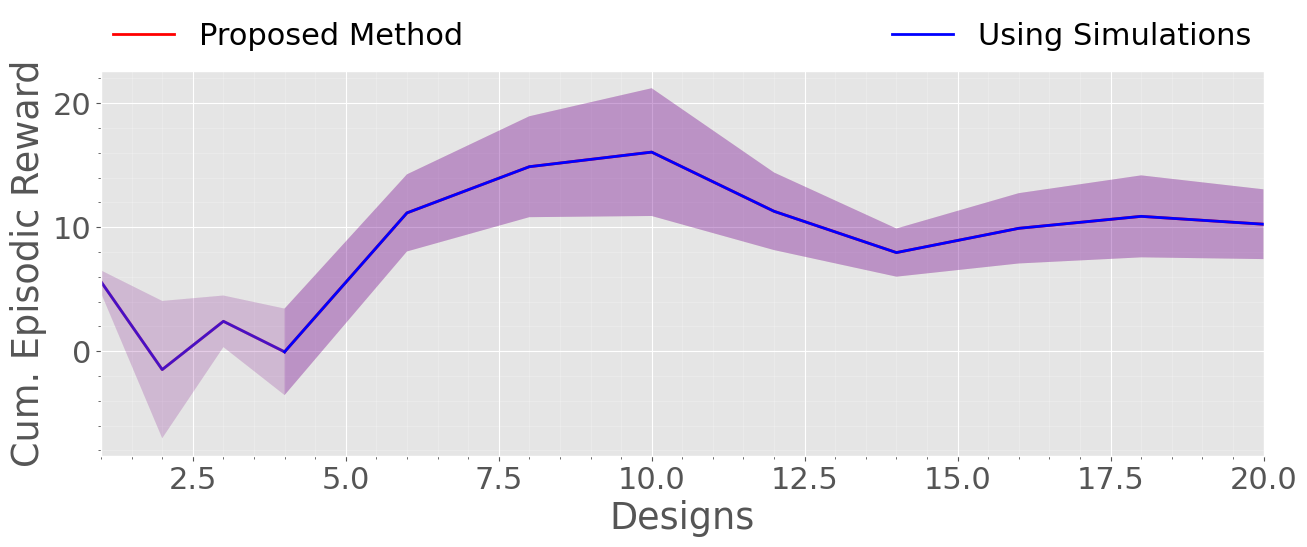

In [17]:
# Compare two experiments/methods against each other
exp_files = ['{}/data_design_'.format(folder) for folder in EXPERIMENT_FOLDERS_1] # Novelty Search + PSO on Q
exp_mean, exp_std = compute_mean_std(exp_files)
plot_data_means(exp_mean, exp_std, color='red', label='Proposed Method')

exp_files = ['{}/data_design_'.format(folder) for folder in EXPERIMENT_FOLDERS_1] # Novelty Search + PSO on Q
exp_mean, exp_std = compute_mean_std(exp_files)
plot_data_means(exp_mean, exp_std, color='blue', label='Using Simulations')
plt.ylabel('Cum. Episodic Reward')
plt.xlabel('Designs')
# plt.ylim([150,600])
plt.xlim([1,DESIGNS-1])
plt.show()

In [34]:
def plot_data_means_optim_random(mean_data, std_data, color, label=''):
    x = np.arange(1, len(mean_data) + 1)
    init_data_mean = mean_data[0:INITIAL_DESIGNS+1]
    init_data_std = std_data[0:INITIAL_DESIGNS+1]
    init_x = x[0:INITIAL_DESIGNS+1]
    optim_data_mean = mean_data[INITIAL_DESIGNS::2]
    optim_data_std = std_data[INITIAL_DESIGNS::2]
    optim_x = x[INITIAL_DESIGNS::2]
    random_data_mean = mean_data[INITIAL_DESIGNS+1::2]
    random_data_std = std_data[INITIAL_DESIGNS+1::2]
    random_x = x[INITIAL_DESIGNS+1::2]

    fig, ax = plt.subplots()
    ax.grid(visible=True, which='minor', color='white', linestyle='-', alpha=0.4)
    ax.plot(init_x, init_data_mean, color=color, alpha=0.3, linewidth=2.0)
    ax.fill_between(init_x, init_data_mean - init_data_std, init_data_mean + init_data_std, facecolor=color, alpha=0.1)
    ax.plot(optim_x, optim_data_mean, color=color, linewidth=2.0, label=label)
    ax.fill_between(optim_x, optim_data_mean - optim_data_std, optim_data_mean + optim_data_std, facecolor=color, alpha=0.2)
    ax.plot(random_x, random_data_mean, color=color, label=label + ' Random Exploration', linestyle='--', linewidth=2.0)
    ax.fill_between(random_x, random_data_mean - random_data_std, random_data_mean + random_data_std, facecolor=color, alpha=0.2)

    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., frameon = 1)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')
    
    fig.set_size_inches(15, 5)
    ax.minorticks_on()
    ax.title.set_fontsize(22)
    ax.set_ylabel('Cum. Episodic Reward')
    ax.set_xlabel('Designs')
    # ax.set_ylim([150,600])
    ax.set_xlim([1, DESIGNS+1])
    # fig.show()

    return fig, ax

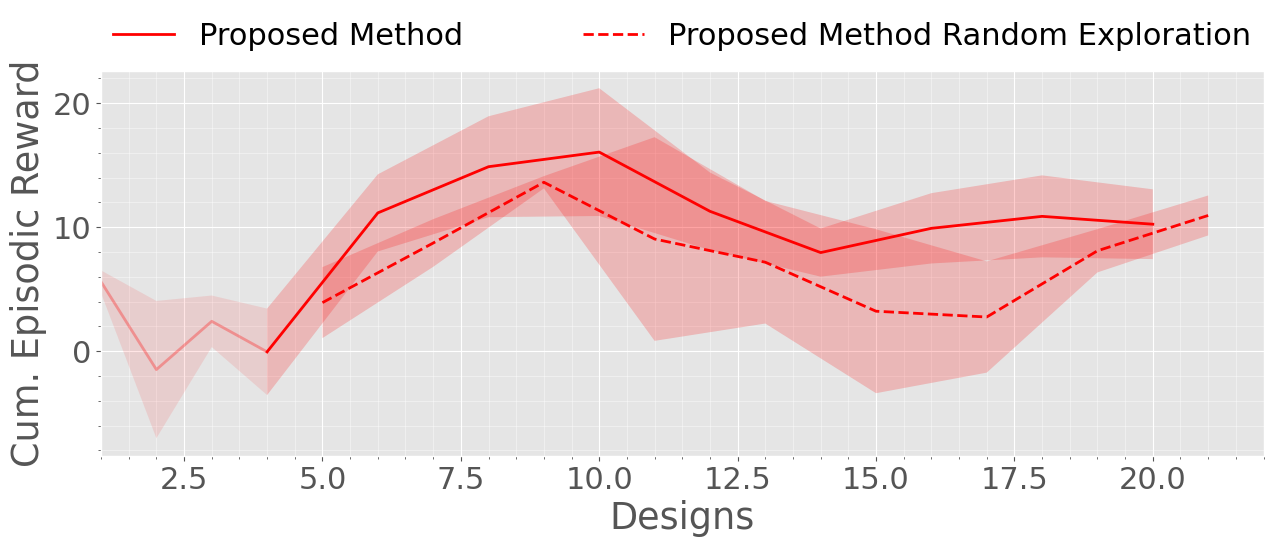

In [35]:
fig, ax = plot_data_means_optim_random(exp_mean, exp_std, color='red', label='Proposed Method')
fig.show()

In [41]:
def plot_data_means(mean_data, std_data, color, label='', plot_random_std=False, fig=None, ax=None):
    x = np.arange(1, len(mean_data) + 1)
    init_data_mean = mean_data[0:INITIAL_DESIGNS+1]
    init_data_std = std_data[0:INITIAL_DESIGNS+1]
    init_x = x[0:INITIAL_DESIGNS+1]
    optim_data_mean = mean_data[INITIAL_DESIGNS::2]
    optim_data_std = std_data[INITIAL_DESIGNS::2]
    optim_x = x[INITIAL_DESIGNS::2]
    random_data_mean = mean_data[INITIAL_DESIGNS+1::2]
    random_data_std = std_data[INITIAL_DESIGNS+1::2]
    random_x = x[INITIAL_DESIGNS+1::2]

    if fig is None or ax is None:
        fig, ax = plt.subplots()

    ax.grid(visible=True, which='minor', color='white', linestyle='-', alpha=0.4)
    ax.plot(init_x, init_data_mean, color=color, alpha=0.7, linewidth=2.0)
    ax.fill_between(init_x, init_data_mean - init_data_std, init_data_mean + init_data_std, facecolor=color, alpha=0.1)
    ax.plot(optim_x, optim_data_mean, color=color, label=label, linewidth=2.0)
    ax.fill_between(optim_x, optim_data_mean - optim_data_std, optim_data_mean + optim_data_std, facecolor=color, alpha=0.2)
    #plt.plot(random_x, random_data_mean, color=color, linestyle='--')
    if plot_random_std:
        ax.fill_between(random_x, random_data_mean - random_data_std, random_data_mean + random_data_std, facecolor=color, alpha=0.2)

    legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0., frameon = 1)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')

    fig.set_size_inches(15, 5)
    ax.minorticks_on()
    ax.title.set_fontsize(22)
    ax.set_ylabel('Cum. Episodic Reward')
    ax.set_xlabel('Designs')

    # ax.set_ylim([150,600])
    ax.set_xlim([1,DESIGNS-1])
    return fig, ax
    # fig.show()

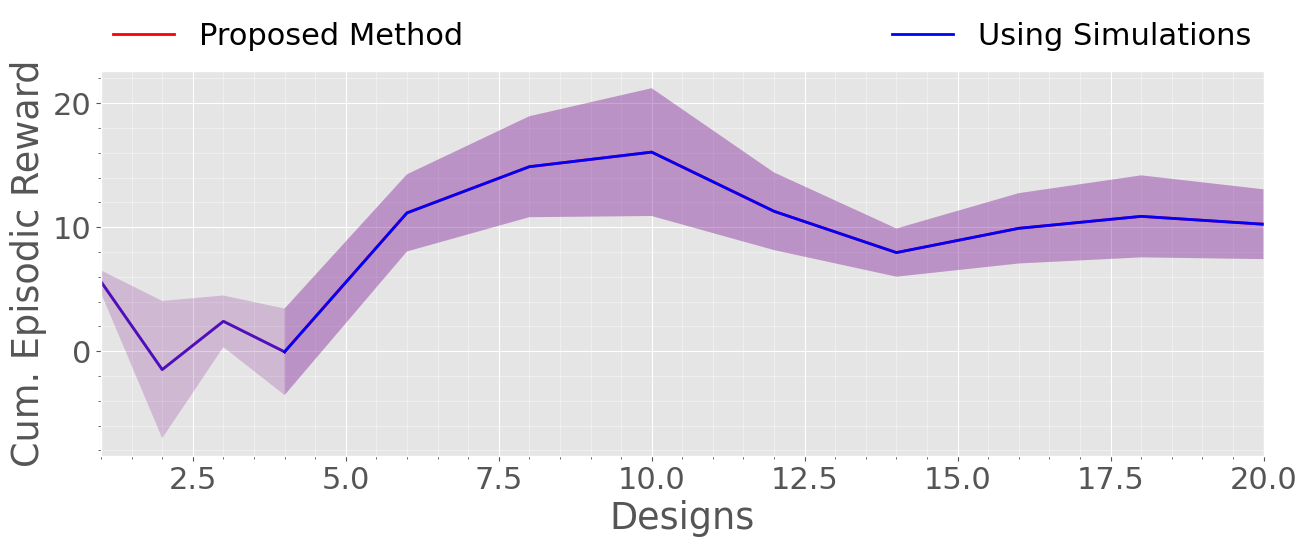

In [42]:
# Compare two experiments/methods against each other
exp_files = ['{}/data_design_'.format(folder) for folder in EXPERIMENT_FOLDERS_1] # Novelty Search + PSO on Q
exp_mean, exp_std = compute_mean_std(exp_files)
fig, ax = plot_data_means(exp_mean, exp_std, color='red', label='Proposed Method')

exp_files = ['{}/data_design_'.format(folder) for folder in EXPERIMENT_FOLDERS_1] # Novelty Search + PSO on Q
exp_mean, exp_std = compute_mean_std(exp_files)
fig, ax = plot_data_means(exp_mean, exp_std, color='blue', label='Using Simulations', fig=fig, ax=ax)
fig.show()